# Übung 13

**Gruppenname:**

*TLJ*

Christian Rene Thelen, Artur Less, Karl Johannes

### Hinweise
* Nutzen Sie für die folgenden Aufgaben **nur** die Mittel, die Ihnen Numpy und Matplotlib zur Verfügung stellt.

In [42]:
import matplotlib as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Serif"
})

### 13.1 K-Means

In der Vorlesung haben Sie K-Means als eine klassische Clustering-Methode aus dem Unsupervised Learning kennengelernt. Sie werden Ihr Wissen über den K-Means Algorithmus vertiefen, indem Sie ihn in dieser Übung implementieren werden. Nutzen Sie für die Implementierung Befehle der Numpy-Bibliothek.

**Ihre Aufgaben**

(1) Schlagen Sie in den Vorlesungsfolien den K-Means Algorithmus nach.

Allen Datenpunkten zufällig zu den Klustern $1, \dots, K$ zuordnen.

Iteriere, bis die Cluster sich nicht mehr ändern:
1. Für jeden der K Cluster, berechne den geometrischen Schwerpunkt (centroid). Der Schwerpunkt ist der Featurevektor, der sich aus der Mittelung aller Featurevektoren der dem Cluster zugehörigen Datenpunkte ergibt.
2. Weise jedem Datenpunkt dem Cluster zu, dessen Schwerpunkt dem Datenpunkt am nächsten liegt (im euklidischem Sinne).

(2) Ich habe Ihnen synthetische Daten zur Übung bereitgestellt. Bitte führen Sie die unten stehende Code-Zelle aus. Sie erzeugt 100 Datenpunkte mit je zwei Features (Merkmalen, Array **X**), organisiert in drei Cluster. Die Clusterzugehörigkeiten sind im Vektor **y** kodiert.

In [43]:
%matplotlib inline
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# generate data
X, y = make_blobs(n_samples=100, n_features=2, centers=3,
                  random_state=1)

(3) [Visualisieren Sie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) die Daten in einem Scatterplot und färben Sie die Cluster gemäß ihrer Clusterzugehörigkeit ein.

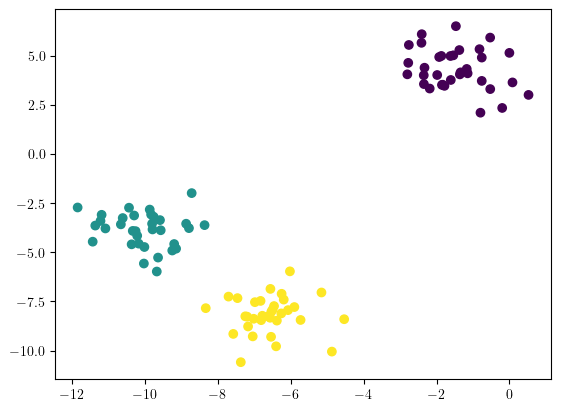

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

(4) Die Anzahl der Cluster sei $K=3$. Implementieren Sie Schritt 1 des K-Means Algorithmus, also die zufällige Zuweisung von Datenpunkten zu den $K$ Clustern. [Dies hier](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) kann Ihnen dabei hilfreich sein.

In [45]:
# Sei C_i die Indexmenge der Datenpunkte aus Cluster i, und i \in [0, K)
K = 3
x_clusterd = np.array([np.random.randint(0, K) for i in range(X.shape[0])])

(5) Visualisieren Sie in einem Scatterplot die Daten und färben Sie die Datenpunkte gemäß Ihrer aus Schritt (4) ermittelten zufälligen Clusterzugehörigkeit ein.

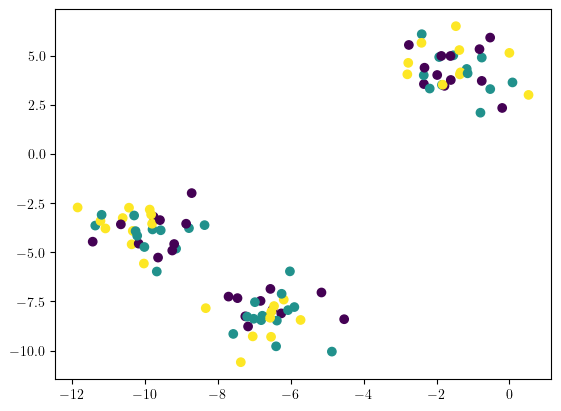

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=x_clusterd)
plt.show()

(6) Implementieren Sie nun eine Iterationsschleife mit den Schritten 2a und 2b aus der Vorlesung, also die Bestimmung der Clusterzentren (geometrische Schwerpunkte) sowie die Neuzuordnung der Datenpunkte zu demjenigen Cluster, dessen Schwerpunkt den kleinsten Abstand zum Datenpunkt hat. Nutzen Sie dabei als Distanzmaß den euklidischen Abstand. Eventuell könnten Ihnen [diese](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html) und [diese](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html) Funktion dabei helfen.
* Das Abbruchkriterium der Iteration finden Sie in der Vorlesung.
* Prüfen Sie nach Schritt 2b, ob die Zuordnung von Datenpunkten zu Clustern tatsächlich alle Cluster enthält. Falls etwa ein Cluster keine Datenpunkte mehr enthält, starten Sie die Prozedur von Schritt 1 an neu. Wir werden später auf die "Leere-Cluster-Problematik" eingehen.
* Es empfiehlt sich, Ihren Code - sobald er funktioniert - in eine Funktion namens `kmeans` zu schreiben, die die Daten $X$ sowie die Clusteranzahl $K$ entgegennimmt, und das Clusteringergebnis $y_\text{pred}$ ausgibt. Sie können dann im weiteren Verlauf dieser Übung einfach nur noch die Funktion `kmeans` aufrufen.

In [47]:
from scipy.spatial import distance

def kmeans(X: np.ndarray, K: int) -> np.ndarray:
    # Schritt 1: Allen Datenpunkten zufällig zu den Klustern $1, \dots, K$ zuordnen.
    x_clusterd = np.random.randint(0, K, size=X.shape[0])

    # Schritt 2a: Für jedes Cluster den geometrischen Schwerpunkt bestimmen
    centroids = np.zeros((2, K))
    x_clusterd_prev = np.zeros(x_clusterd.shape)
    while not np.array_equal(x_clusterd, x_clusterd_prev):
        print("Step")
        x_clusterd_prev = x_clusterd.copy()

        for i in range(K):
            # C_i ist die Menge der Datenindizes, welche im Cluster i liegen
            C_i = [x_idx for x_idx in range(len(x_clusterd)) if x_clusterd[x_idx] == i]
            centroids[:, i] = 1 / len(C_i) * np.sum(X[C_i], axis=0)

        # Schritt 2b: Jeden Datenpunkt dem nächstgelegenen Cluster zuweisen
        distances = distance.cdist(X, centroids.T, metric='euclidean')
        x_clusterd = np.argmin(distances, axis=1)

        # Überprüfe ob die Zuordnung von Datenpunkten zu Clustern tatsächlich alle Cluster enthält
        if np.unique(x_clusterd).shape[0] != K:
            print("Wiederhole von Schritt 1")
            x_clusterd = np.random.randint(0, K, size=X.shape[0])

    return x_clusterd

(7) Führen Sie nun mit Ihrer Implementierung K-Means auf den Daten aus ($K=3$). Visualisieren Sie die Daten in einem Scatterplot und färben Sie sie gemäß der durch K-Means ermittelten Clusterzugehörigkeiten ein. Vergleichen Sie Ihren Plot mit dem aus Schritt (5).

Step
Step
Step


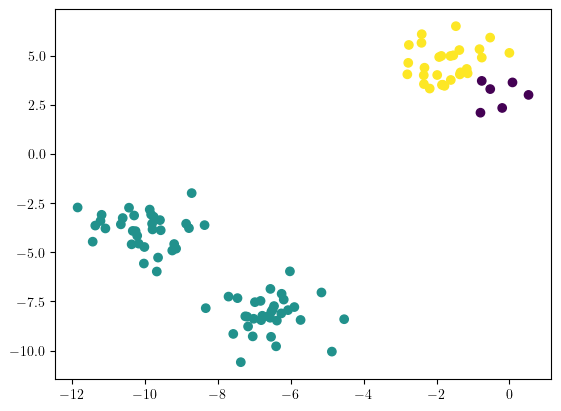

In [48]:
x_clusterd_new = kmeans(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=x_clusterd_new)
plt.show()

Sie haben im vorherigen Schritt gesehen, dass Sie mithilfe von K-Means Cluster im Datensatz identifizieren können. Nun geht es darum, Ihre Implementierung abzusichern, sodass Sie leeren Clustern, die während der Iterationen entstehen können, umgehen kann.

(8) Implementieren Sie vor Schritt 2a (also zu Beginn Ihrer Iteration) ein Verfahren, das überprüft, ob es Cluster gibt, die keine Datenpunkte enthalten. In diesem Falle wählen Sie einen zufälligen Datenpunkt aus und weisen ihn dem leeren Cluster zu. Dieser [Befehl](https://www.w3schools.com/python/ref_set_difference.asp) könnte Ihnen bei diesem Unterfangen hilfreich sein.

* Wie kann es dazu kommen, dass wir während der Iteration leere Cluster erhalten? Schauen Sie sich zur Erklärung das [hier](http://user.ceng.metu.edu.tr/~tcan/ceng465_f1314/Schedule/KMeansEmpty.html) verlinkte Beispiel an.
* Wenn Sie Schritt (8) fertig bearbeitet haben, entfernen Sie einfach den Neustart-Mechanismus, den Sie in Schritt (6) implementiert hatten. Sie brauchen diesen nicht mehr.

Fällt während einer Iteration der Schwerpunkt des Clusters $C_i$ so zwischen zwei umliegende Cluster $C_a$ und $C_b$, dass alle Elemente $i \in C_i$ bei der nächsten Iteration eine geringere euklidische Distanz zu den Cluster Schwerpunkten $C_a$ und $C_b$ haben, dann _zerreißt_ das Cluster $C_i$ und wird leer.

In [49]:
from scipy.spatial import distance
import random

def kmeans(X: np.ndarray, K: int) -> tuple[np.ndarray, np.ndarray]:
    assert X.shape[0] > K, "Es können nicht mehr Cluster als Datenpunkte gebildet werden"
    # Schritt 1: Allen Datenpunkten zufällig zu den Klustern $1, \dots, K$ zuordnen.
    x_clusterd = np.random.randint(0, K, size=X.shape[0])

    # Schritt 2
    centroids = np.zeros((2, K))
    x_clusterd_prev = np.zeros(x_clusterd.shape)
    while not np.array_equal(x_clusterd, x_clusterd_prev):
        x_clusterd_prev = x_clusterd.copy()

        # Überprüfe, ob einzelne Cluster leer sind
        if np.unique(x_clusterd).shape[0] != K:
            # Da auch mehrere Cluster leer sein können, müssen wir hier durch alle leeren Cluster iterieren.
            empty_clusters = set(range(K)).difference(x_clusterd)
            # print(f"Leere(s) Cluster {empty_clusters} gefunden.")
            # um sicher zu stellen, dass nicht zufällig mehrfach der gleiche Datenpunkt ausgewählt wird
            replaced_idxs = set()
            for ec in empty_clusters:
                random_idx = random.choice(list(set(range(x_clusterd.shape[0])).difference(replaced_idxs)))
                replaced_idxs.add(random_idx)
                x_clusterd[random_idx] = ec

        # Schritt 2a: Für jedes Cluster den geometrischen Schwerpunkt bestimmen
        for i in range(K):
            # X_i ist die Menge der Daten, welche im Cluster i liegen
            X_i = X[x_clusterd == i]
            if len(X_i) > 0:
                centroids[:, i] = np.mean(X_i, axis=0)

        # Schritt 2b: Jeden Datenpunkt dem nächstgelegenen Cluster zuweisen
        distances = distance.cdist(X, centroids.T, metric='euclidean')
        x_clusterd = np.argmin(distances, axis=1)

    return x_clusterd, centroids

(9) Ermitteln Sie Cluster für $K=2, 3, 4, 5$ und visualisieren Sie sie (wie in Schritt 7) in Scatterplots. Was fällt Ihnen auf? (1-3 Sätze)

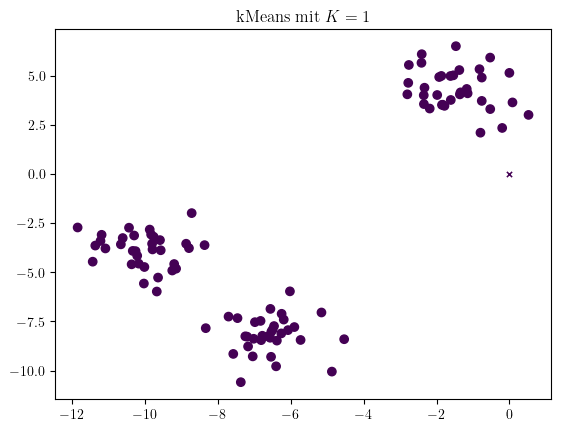

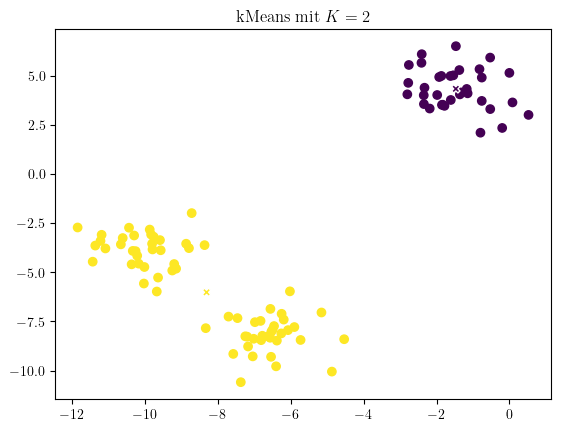

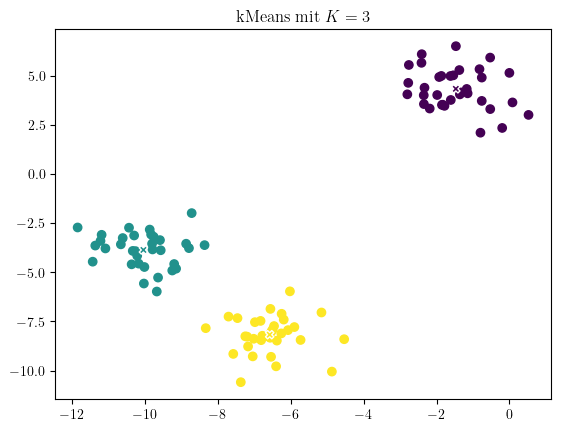

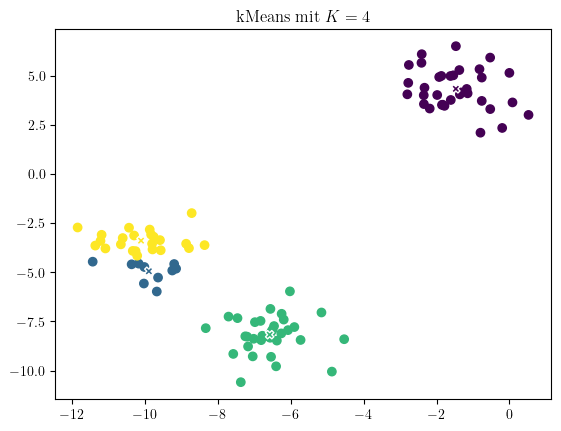

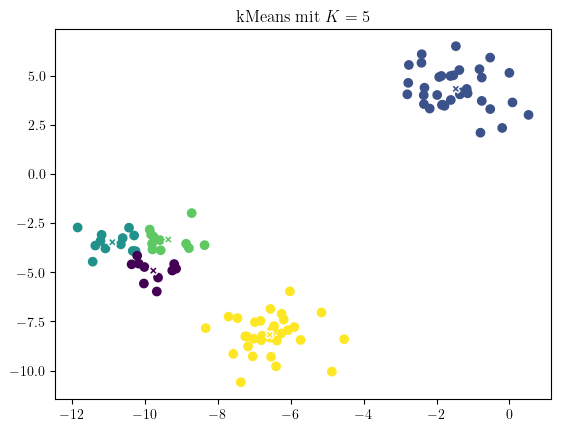

In [50]:
for K in 1, 2, 3, 4, 5:
    x_clusterd_new, x_centroids = kmeans(X, K)
    plt.title(f"kMeans mit $K={K}$")
    plt.scatter(X[:, 0], X[:, 1], c=x_clusterd_new)
    plt.scatter(x_centroids[0, :], x_centroids[1, :], c=range(K), edgecolors='white', marker="X")
    plt.show()

(10) Ermitteln Sie für den unten erzeugten Datensatz mithilfe von K-Means $K=2$ Cluster und visualisieren Sie das Clusterergebnis (vergessen Sie nicht, die Punkte gemäß ihrer Clusterzugehörigkeit einzufärben).

In [51]:
from sklearn.datasets import make_moons
[X2, y2] = make_moons(random_state=1)

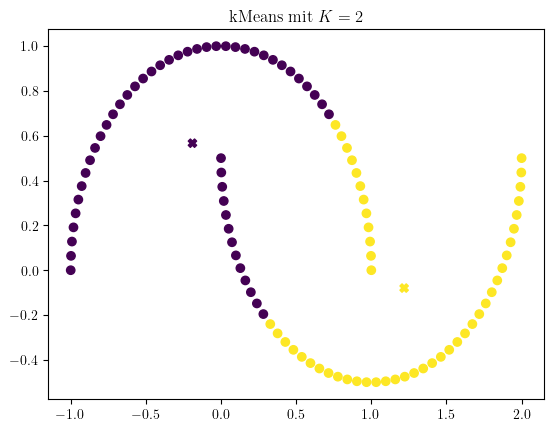

In [52]:
K2 = 2
X2_clusterd, X2_centroids = kmeans(X2, K2)
plt.title(f"kMeans mit $K={K2}$")
plt.scatter(X2[:, 0], X2[:, 1], c=X2_clusterd)
plt.scatter(X2_centroids[0, :], X2_centroids[1, :], c=range(K2), marker="X")
plt.show()

(11) Erklären Sie, warum Sie im vorherigen Schritt nicht die Cluster erhalten, wie Sie sie für die Daten erwarten würden. Mit welchem anderen Clusteransatz könnten Sie eventuell die korrekten Cluster ermitteln? (3-6 Sätze).

kMeans verwendet die euklidische Distanz der Datenpunkte, um Schwerpunkte zu ermitteln und Datenpunkte den Clustern zuzuordnen. Um bei diesem Datensatz Cluster zu bilden, bei denen die unmittelbare Distanz zu anliegenden Datenpunkten entscheidender sein soll, als der Abstand zu einem gemeinsamen Schwerpunkt, bietet sich eine Featuretransformation an.

(12) \[Optional\] Schlagen Sie in den Vorlesungsfolien nach, wie die summierte Intra-Cluster-Variation $\sum_{k=1}^K W(C_k)$ definiert ist. Implementieren Sie eine Funktion `icv`, die die Daten $X$ sowie die Clusterzugehörigkeit $y$ entgegennimmt und Ihnen die summierte Intra-Cluster-Variation zurückgibt.

Die **Intra-Cluster-Variation** $W(C_k)$ des Clusters $C_k$ ist die Summe der quadratischen euklidischen Distanzen zwischen allen Datenpunkten.

$$\begin{aligned}
    W(C_k) &= \frac{1}{|C_K|} \sum_{i, i'\in C_K} \sum^p_{j=1} (x_{ij} - x_{i'j})^2 \\
    & = 2 \sum_{i \in C_K} \sum^{p}_{j=1} (x_{ij} - \bar{x}_{kj})^2
\end{aligned}$$

mit Centroid: $ \bar{x}_{kj} = \frac{1}{|C_{K}|} \sum_{i \in C_{K}} x_{ij}$

Das Clustering ist gut, wenn die Intra-Cluster-Variation minimiert werden wird, also wir Cluster haben, in denen der euklidische Abstand zwsichen den Datenpunkten möglichst klein ist.

In [53]:
from scipy.spatial import distance
from itertools import combinations

def icv(X: np.ndarray, y:np.ndarray) -> float:
    summed_intra_cluster_variation = 0
    # äußere Summe, iteriere über alle Klassen k
    for k in np.unique(y):
        # Erstelle alle x_ij und x_i'j paare
        X_k = X[y == k]
        # innere Summe, Differenzenquadrate und Mittelwert
        distances = distance.cdist(X_k, X_k, metric='euclidean')
        intra_cluster_variation = np.sum(distances ** 2) / float(X_k.shape[0])
        summed_intra_cluster_variation += intra_cluster_variation
    return summed_intra_cluster_variation

icv(X2, x_clusterd)

197.45602964151115

(13) \[Optional\] Sie wissen aus der Vorlesung, dass K-Means Clustering-Ergebnisse liefern kann, die lokalen Minima in der Intra-Cluster-Variation entsprechen. Das erzielte Clustering hängt von der zufälligen Initialisierung der Clusterzugehörigkeiten in Schritt 1 des Algorithmus ab. Wir wollen nun erreichen, dass Ihre Implementierung von kmeans mehrfache ($n=20$) Clustering-Versuche mit unterschiedlichen zufälligen initialen Clusterzugehörigkeiten unternimmt und das Clustering mit der niedrigsten Intra-Cluster-Variation zurückliefert. Ändern Sie dementsprechend Ihre Funktion ab und implementieren Sie diese Funktionalität.

In [54]:
def repeated_kmeans(X: np.ndarray, K: int, repeats=20) -> tuple[float, np.ndarray, np.ndarray]:
    best_icv: float = float('inf')
    for i in range(repeats):
        y, centroids = kmeans(X, K)
        y_icv = icv(X, y)
        if y_icv < best_icv:
            best_icv, best_y, best_centroids = y_icv, y, centroids
    return (best_icv, best_y, best_centroids)

repeated_kmeans(X, 8, 200)

(137.68416167679362,
 array([5, 3, 4, 0, 2, 2, 2, 3, 7, 6, 3, 0, 1, 7, 1, 2, 2, 6, 4, 4, 2, 4,
        2, 6, 3, 1, 2, 6, 5, 1, 7, 6, 1, 6, 0, 2, 0, 4, 3, 2, 2, 3, 6, 4,
        0, 2, 7, 5, 6, 6, 3, 1, 2, 2, 7, 2, 4, 0, 7, 6, 0, 2, 2, 3, 4, 2,
        7, 2, 6, 0, 0, 3, 2, 7, 7, 3, 2, 2, 6, 4, 7, 4, 0, 2, 6, 5, 7, 5,
        4, 6, 2, 6, 7, 4, 0, 2, 1, 7, 2, 5]),
 array([[ -9.36629955,  -6.71487118,  -6.5461862 ,  -9.7773266 ,
         -10.90217241,  -0.27747188,  -1.92463897,  -1.49864271],
        [ -3.32909279,  -9.55885468,  -7.79911535,  -4.91390605,
          -3.46714752,   3.02265624,   3.93048247,   5.41325119]]))

(14) \[Optional\] Bestimmen Sie mit Ihren Funktionen aus den Schritten (12) und (13) die Intra-Cluster-Variation für $K=1, \ldots 8$ und tragen Sie diese Größe gegen $K$ in einem Plot auf.

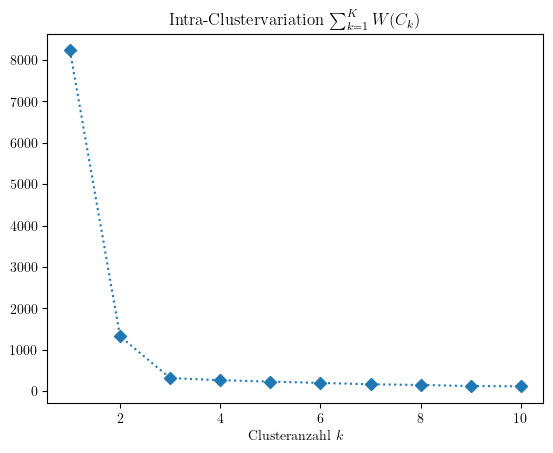

In [55]:
icvs: list[float] = []
for K in range(1, 10+1):
    icv_k, _, _ = repeated_kmeans(X, K, 20)
    icvs.append(icv_k)

plt.title("Intra-Clustervariation $\sum_{k=1}^K W(C_k)$")
plt.plot(range(1, 10+1), icvs, 'D:')
plt.xlabel("Clusteranzahl $k$")
plt.show()

(15) \[Optional\] Die "korrekte" Anzahl an Clustern (sofern es sie überhaupt gibt) ist notorisch schwierig zu bestimmen und Methoden, diese zu bestimmen, ist aktueller Forschungsgegenstand. Ein pragmatischer Ansatz ist es, sich die Intra-Cluster-Variation (ICV) als Funktion der Clusteranzahl $K$ zu plotten und das $K$ auszuwählen, zu dem die ICV gerade stark abgesunken ist. Betrachten Sie dazu Ihren Plot aus Schritt (14): Gibt es ein $K$, ab der die summierte Intra-Cluster-Variation stark sinkt? Geben Sie diesen Wert für $K$ an. Ist dieser Wert Ihrer Meinung nach sinnvoll?

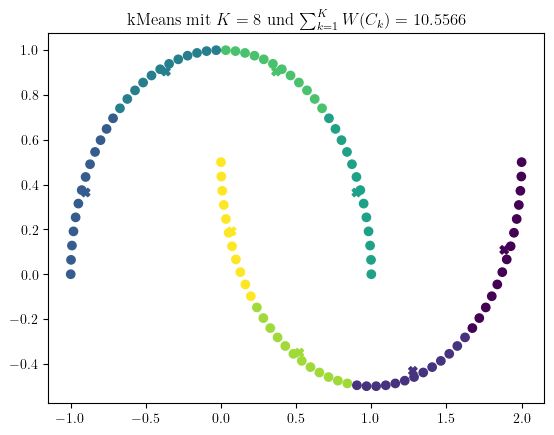

In [56]:
K2 = 8
X2_icv, X2_clusterd, X2_centroids = repeated_kmeans(X2, K2, 30)
plt.title(f"kMeans mit $K={K2}$ und $\sum_" + "{k=1}^K" + f"W(C_k)= {X2_icv:.4f}$")
plt.scatter(X2[:, 0], X2[:, 1], c=X2_clusterd)
plt.scatter(X2_centroids[0, :], X2_centroids[1, :], c=range(K2), marker="X")
plt.show()

Damit darf ich Ihnen gratulieren. Sie haben das K-Means-Clusteringverfahren intensiv durchdrungen. K-Means wird Ihnen in Data Science und Machine Learning Projekten oft begegnen.
